<br>

# **T-Test**

두 개 이하의 집단 간 차이분석를 분석하는 방법이다. 평균 또는 비율 차이를 분석한다.  

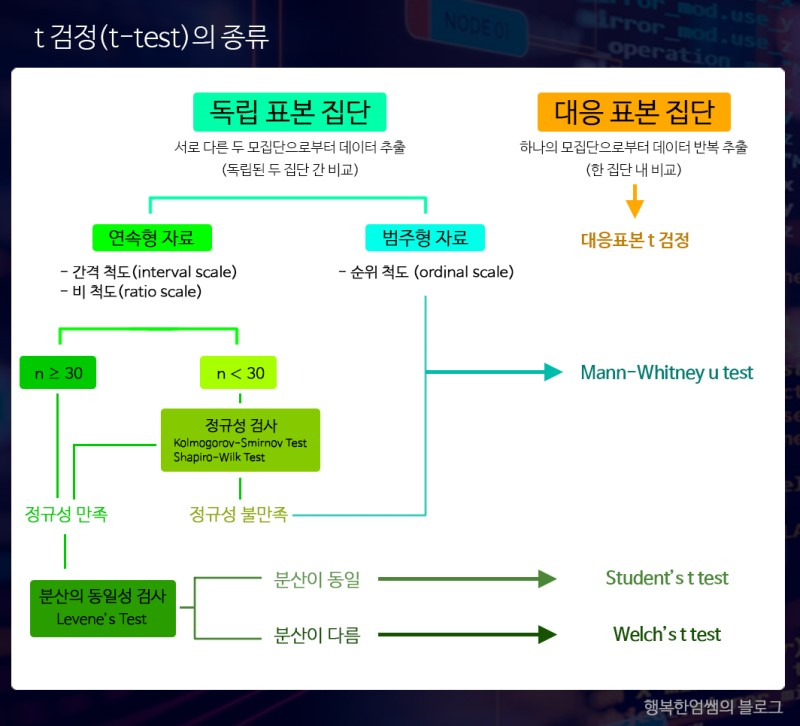

이미지 출처 : https://m.blog.naver.com/sendmethere/221333164258  



## 🔹 T-Value

T-Value란 t검정에 이용되는 검정통계량으로, 두 집단의 평균의 차이를 표준오차(불확실도)로 나눈 값 즉, 표준오차와 표본 평균의 차이의 비율이다.  

> t = 평균의 차이 / 표본오차 

T-Value는 통계적 지표로, 두 집단의 차이, 오류 등을 나타낸다.  

T-Value의 크기가 클수록 유의한 차이가 있다는 증거가 더 명확해진다. T-Value의 절대값이 커질 수록 P-Value가 작아지기 때문이다.  
반면 T-Value가 0에 가까울수록 유의미한 차이가 없을 가능성이 커진다.   




<br>

# 📝 **단일표본 T 검정 (one-sample t-test)** : `stats.ttest_1samp()`

하나의 집단에 대한 표본평균이 예측된 평균과 같은지 여부를 확인  


<br>

## 연습 1) 어느 남성 집단의 평균 키 검정

가설설정  
> 귀무가설 : 집단의 평균키가 177이다.  
대립가설 : 집단의 평균키가 177이 아니다.  

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

one_sample = [177.0, 182.7, 169.6, 176.8, 180.0]
print(np.array(one_sample).mean())  

177.21999999999997



결과 : 177.21999999999997

평균에 차이가 있다고 보아야 하는가?  -> 검정을 통해 확인하자.  

<br>

### t-검정 실시

In [ ]:
result = stats.ttest_1samp(one_sample, popmean=177)

print('t값: %.3f, p-value: %.3f'%result)

t값: 0.100, p-value: 0.925



p-value: 0.925가 유의수준 0.05보다 크므로 귀무가설을 채택한다.  


In [ ]:
#popmean을 167로 설정한다면?
result2 = stats.ttest_1samp(one_sample, popmean=167)

print('t값: %.3f, p-value: %.3f'%result2)

t값: 4.664, p-value: 0.010


<br>

## 연습 2) 한 집단의 평균 검정

가설설정  
> 귀무가설 : 데이터의 평균은 0이다.  
대립가설 : 데이터의 평균은 0이 아니다.  


### 정규성 만족 여부 확인 : `stats.shapiro()`


In [ ]:
np.random.seed(123)
mu = 0
n = 10
x = stats.norm(mu).rvs(n)

#print(x)
print(np.mean(x))
print()
print('정규성 만족 여부 확인 :', stats.shapiro(x))

-0.26951611032632805

정규성 만족 여부 확인 : (0.9674148559570312, 0.8658965229988098)



p-value가 0.8658965229988098로 0.05보다 크므로 정규성을 만족한다.  


<br>

#### 시각화로 정규성 확인 : `sns.distplot()`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


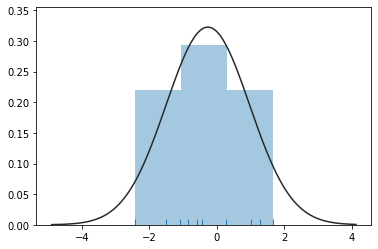

In [ ]:
import seaborn as sns

sns.distplot(x, kde=False, rug=True, fit=stats.norm)
plt.show()


<br>

### t-검정 실시

In [ ]:
result3 = stats.ttest_1samp(x, popmean=0)

print('t값: %.6f, p-value: %.6f'%result3)

t값: -0.654004, p-value: 0.529464


p-value가 0.529464로 유의수준 0.05보다 크므로 귀무가설을 채택한다.  

In [ ]:
#popmean을 0.8로 설정한다면?
result4 = stats.ttest_1samp(x, popmean=0.8)

print('t값: %.6f, p-value: %.6f'%result4)

t값: -2.595273, p-value: 0.028962



p-value: 0.028962 < 0.05로 귀무가설 기각, 대립가설 채택  



<br>

## 연습 3) 국어 점수 평균 검정 : student.csv  

A중학교 1학년 1반 학생들의 시험결과가 담긴 파일을 읽어 검정한다.  

<br>

가설설정  
> 귀무가설 : 학생들의 국어 점수 평균은 80이다.  
대립가설 : 학생들의 국어 점수 평균은 80이 아니다.  


In [ ]:
import pandas as pd

student = pd.read_csv('/content/drive/MyDrive/testdata/student.csv')
print(student.head(5))
print(len(student))

    이름  국어  영어  수학
0  박치기  90  85  55
1  홍길동  70  65  80
2  김치국  92  95  76
3  임꺽정  76  89  88
4  신선해  97  87  83
20


In [ ]:
print(student.describe())
print()

print(np.mean(student.국어))

               국어          영어          수학
count   20.000000   20.000000   20.000000
mean    72.900000   71.750000   73.700000
std     23.834738   19.931131   17.747053
min     20.000000   30.000000   40.000000
25%     58.750000   63.750000   63.250000
50%     82.500000   70.000000   80.000000
75%     90.500000   87.000000   84.000000
max    100.000000  100.000000  100.000000

72.9


<br>

### t-검정 실시


In [ ]:
result_kor = stats.ttest_1samp(student.국어, popmean=80)

print('t값: %.6f, p-value: %.6f'%result_kor)

t값: -1.332180, p-value: 0.198561



p-value: 0.198561로, 0.05 보다 크므로 귀무가설 채택.  


In [ ]:
#평균이 60점 인가?
result_kor2 = stats.ttest_1samp(student.국어, popmean=60)

print('t값: %.6f, p-value: %.6f'%result_kor2)

t값: 2.420440, p-value: 0.025688


p-value: 0.025688로 귀무가설을 기각하고 대립가설을 채택한다.  
즉, 평균이 60점이 아니다.  

<br>

## 연습 4) 여아 신생아 몸무게의 평균 검정 : babyboom.csv 

여아 신생아의 몸무게는 평균이 2800(g)으로 알려져 왔으나 이보다 더 크다는 주장이 나왔다.  
여아 18명을 표본으로 추출해 체중을 측정했다고 할 때 새로운 주장이 맞는 지 검정해보자.  

<br>

가설설정  
> 귀무가설 : 여아 신생아의 몸무게 평균은 2800(g)이다.  
대립가설 : 여아 신생아의 몸무게 평균은 2800(g)이 아니다.


In [ ]:
baby = pd.read_csv('/content/drive/MyDrive/testdata/babyboom.csv')

print(baby.head(5))  # 1:여아, 2:남아 
print(baby[baby['gender']==1].describe())

   time  gender  weight  minutes
0     5       1    3837        5
1   104       1    3334       64
2   118       2    3554       78
3   155       2    3838      115
4   257       2    3625      177
              time  gender       weight      minutes
count    18.000000    18.0    18.000000    18.000000
mean   1273.000000     1.0  3132.444444   773.000000
std     737.695218     0.0   631.582534   446.050775
min       5.000000     1.0  1745.000000     5.000000
25%     837.750000     1.0  2711.000000   507.750000
50%    1406.500000     1.0  3381.000000   846.500000
75%    1804.250000     1.0  3517.250000  1094.250000
max    2355.000000     1.0  3866.000000  1435.000000


In [ ]:
fdata = baby[baby.gender==1]

print(fdata.head(3))
print(len(fdata))
print(np.mean(fdata.weight))

   time  gender  weight  minutes
0     5       1    3837        5
1   104       1    3334       64
5   405       1    2208      245
18
3132.4444444444443


### 정규성 확인  

In [ ]:
print(stats.shapiro(fdata.iloc[:, 2]))

(0.8702830076217651, 0.017984798178076744)



p-value 0.017984798178076744 < 0.05로 정규성을 따른 다고 할 수 없다.  
 

<br>

#### 시각화를 통해 정규분포(정규성) 확인  : `sns.distplot()`  

분포 히스토그램  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


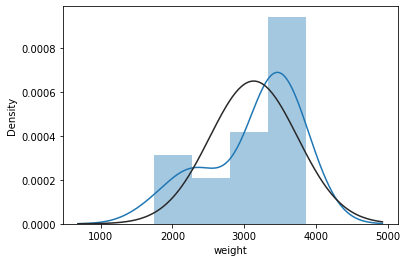

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(fdata.iloc[:, 2], fit=stats.norm)
plt.show()


그래프를 보면 값들이 한 쪽으로 치우져 있는 것을 확인할 수 있다.  
-> 정규성을 따르지 않는다고 볼 수 있다. 


<br>

#### 잔차의 정규성 확인 Q-Q Plot : `stats.probplot()`

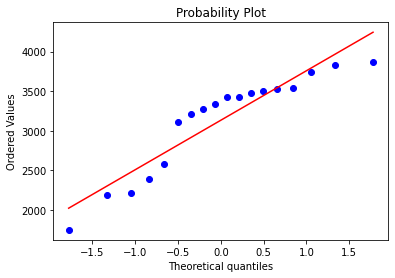

In [ ]:
stats.probplot(fdata.iloc[:, 2], plot=plt)
plt.show()


잔차가 정규성을 따른 다고 볼 수 없다. 


<br>

### t-검정 실시

In [ ]:
result_baby = stats.ttest_1samp(fdata.weight, popmean=2800)

print('t값: %.6f, p-value: %.6f'%result_baby)

t값: 2.233188, p-value: 0.039268



p-value: 0.039268 < 0.05 로 귀무가설을 기각하고 대립가설을 채택한다.  
즉, 여아 신생아 몸무게의 평균은 2800(g)이 아니다.  보다 증가하였다.  




<br>

# 📝 **독립표본 T 검정 (Independent samples t-test)**  

차이분석 중 두 집단 평균 차이 검정  
서로 독립인 두 집단의 평균 차이를 검정한다.  

남녀의 성적, A반과 B반의 키, 경기도와 충청도의 소득 등의 서로 독립인 두 집단에서 얻은 표본을 독립표본이라고 한다.  



<br>

## 연습 1)  남녀 두 집단 간 파이썬 시험 성적의 평균 차이 검정  

가설설정  
> 귀무가설 : 두 집단 간 파이썬 시험 성적의 평균에 차이가 있다.  
대립가설 : 두 집단 간 파이썬 시험 성적의 평균에 차이가 없다.  


In [ ]:
from scipy import stats
import pandas as pd
from numpy import average

male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]
print(average(male))
print(average(female))

83.8
72.24



<br>

### t-검정 실시

In [ ]:
two_sample = stats.ttest_ind(male, female)
print(two_sample)

t, p = two_sample
print('p값 :', p)

Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
p값 : 0.2525076844853278



p-value가 0.252507로 유의수준 0.05 보다 크므로 귀무가설을 채택한다.  
두 집단 간 성적 평균에 차이가 없다.  


<br>

## 연습 2) 두 가지 교육방법에 따른 평균 시험 점수에 대한 검정 수행  

데이터 : two_sample.csv  

가설설정
> 귀무가설 : 두 가지 교육방법에 따른 평균시험 점수에 차이가 없다.  
대립가설 : 두 가지 교육방법에 따른 평균시험 점수에 차이가 있다.    

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/testdata/two_sample.csv')
print(data.head(3))

ms = data[['method','score']]
print(ms.head(3))
print()

m1 = ms[ms['method']==1]
m2 = ms[ms['method']==2]

score1 = m1['score']
score2 = m2['score']
#print(score1)

print(score1.isnull().sum())
print(score2.isnull().sum())
print()

#score2 = score2.fillna(0)   #NaN인 경우 0으로 채우기
score2 = score2.fillna(score2.mean())  #NaN인 경우 평균으로 채우기

print(score1.isnull().sum())
print(score2.isnull().sum())

   no  gender  method  survey  score
0   1       1       1       1    5.1
1   2       1       2       0    NaN
2   3       1       1       1    4.7
   method  score
0       1    5.1
1       2    NaN
2       1    4.7

0
2

0
0



<br>

### 데이터의 분포를 시각화하여 정규성 확인  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


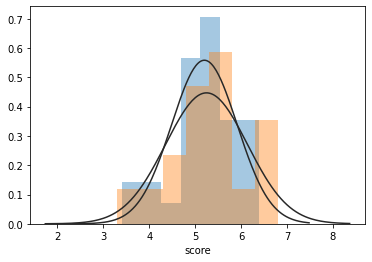

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(score1, kde=False, fit = stats.norm)
sns.distplot(score2, kde=False, fit = stats.norm)
plt.show()

<br>

### `stats.shapiro()` 함수로 정규성 확인  

In [ ]:
print(stats.shapiro(score1))
print(stats.shapiro(score2))

# 두 분포 모두 정규성 만족

(0.965552806854248, 0.3679903745651245)
(0.9621098637580872, 0.6714189648628235)



<br>

### 등분선성 만족 여부 확인 : `stats.levene(), stats.fligner(), stats.bartlett()` 

In [ ]:
#모수적 검정일 때
print(stats.levene(score1, score2))
print(stats.fligner(score1, score2))

#비모수적 검정일 때
print(stats.bartlett(score1, score2))  

LeveneResult(statistic=0.5626824030182838, pvalue=0.4568427112977609)
FlignerResult(statistic=0.5878870391441374, pvalue=0.44323735267062647)
BartlettResult(statistic=1.2274825627365802, pvalue=0.26789717886602216)



p-value가 0.05보다 크므로 등분산성을 만족한다.  


<br>

### t-검정 실시



#### 정규성을 만족한 경우  


In [ ]:
result = stats.ttest_ind(score1, score2)  
print('t검정 통계량 : %.5f, p-value: %.5f'%result)

t검정 통계량 : -0.19649, p-value: 0.84505



p-value: 0.84505 > 0.05 로 귀무가설을 채택한다.  
두 가지 교육방법에 따른 평균 시험 점수에 차이가 없다.  



#### 정규성을 만족하지 못한 경우  


In [ ]:
print(stats.mannwhitneyu(score1, score2))

MannwhitneyuResult(statistic=261.0, pvalue=0.3483878790262923)


<br>

#### 등분산성을 만족한 경우  


In [ ]:
result = stats.ttest_ind(score1, score2, equal_var=True)   #등분산성 만족한 경우

print('t검정 통계량 : %.5f, p-value: %.5f'%result)

t검정 통계량 : -0.19649, p-value: 0.84505



#### 등분산성을 만족하지 못한 경우  

In [ ]:
result = stats.ttest_ind(score1, score2, equal_var=False)  #등분산성을 만족하지 못한 경우

print('t검정 통계량 : %.5f, p-value: %.5f'%result)

t검정 통계량 : -0.18204, p-value: 0.85693



<br>

## 예제 1) 강수 여부에 따른 매출액 평균 차이 검정  

어느 음식점의 매출데이터와 날씨데이터를 사용해 강수 여부에 따른 매출액 평균의 차이를 검정한다.  

가설설정
> 귀무가설 : 강수여부에 따른 매출액의 평균 차이가 없다.  
대립가설 : 강수여부에 따른 매출액의 평균 차이가 았다.  

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/tsales.csv')
print(sales.info())
print(sales.head(3))
print()

weather = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/tweather.csv')
print(weather.info())
print(weather.head(3))
print()

#날씨데이터와 매출데이터의 날짜컬럼의 형식이 서로 다름. 
#하이픈을 제거하여 형식을 통일시킨다.    
weather.tm = weather.tm.map(lambda x:x.replace('-','')).astype('int64')
print(weather.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YMD     328 non-null    int64
 1   AMT     328 non-null    int64
 2   CNT     328 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB
None
        YMD    AMT  CNT
0  20190514      0    1
1  20190519  18000    1
2  20190521  50000    4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    object 
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 49.5+ KB
None
  


### 두 데이터를 날짜를 기준으로 join  


In [ ]:
frame = sales.merge(weather, how='left', left_on='YMD', right_on='tm')
print(frame.head(3))
print(frame.columns)
print()

data = frame.iloc[:,[0,1,7,8]]
print(data.head(3))

        YMD    AMT  CNT  stnId        tm  ...  maxTa  sumRn  maxWs  avgWs  ddMes
0  20190514      0    1    108  20190514  ...   26.9    0.0    4.1    1.6    0.0
1  20190519  18000    1    108  20190519  ...   21.6   22.0    2.7    1.2    0.0
2  20190521  50000    4    108  20190521  ...   23.8    0.0    5.9    2.9    0.0

[3 rows x 12 columns]
Index(['YMD', 'AMT', 'CNT', 'stnId', 'tm', 'avgTa', 'minTa', 'maxTa', 'sumRn',
       'maxWs', 'avgWs', 'ddMes'],
      dtype='object')

        YMD    AMT  maxTa  sumRn
0  20190514      0   26.9    0.0
1  20190519  18000   21.6   22.0
2  20190521  50000   23.8    0.0


In [ ]:
#새로운 컬럼 추가

#data['rain_yn'] = (data['sumRn'] > 0).astype(int)
#print(data.head(3))
#print()

#print(True*1, ' ', False*1)
data['rain_yn'] = (data.loc[:, ('sumRn')] >0)*1
print(data.head(3))

        YMD    AMT  maxTa  sumRn  rain_yn
0  20190514      0   26.9    0.0        0
1  20190519  18000   21.6   22.0        1
2  20190521  50000   23.8    0.0        0

        YMD    AMT  maxTa  sumRn  rain_yn
0  20190514      0   26.9    0.0        0
1  20190519  18000   21.6   22.0        1
2  20190521  50000   23.8    0.0        0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<br>

### 두 집단 간 평균 차이 검정  



#### 매출액 시각화  

[     0  50000 125000]
[ 18000 274000 318000]


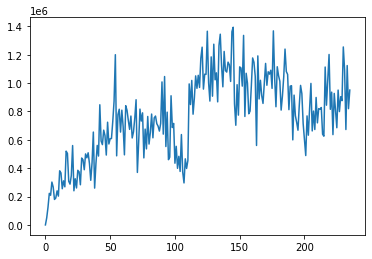

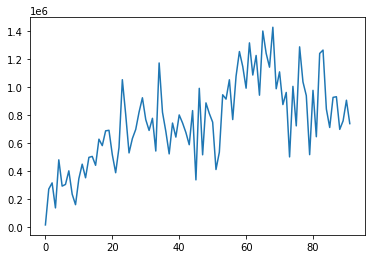

In [ ]:
sp = np.array(data.iloc[:, [1,4]])
#print(sp)

tg1 = sp[sp[:,1]==0, 0]  #집단1 : 비 안올 때의 매출액
tg2 = sp[sp[:,1]==1, 0]  #집단2 : 비 올 때의 매출액

print(tg1[:3])
print(tg2[:3])

plt.plot(tg1)
plt.show()

plt.plot(tg2)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


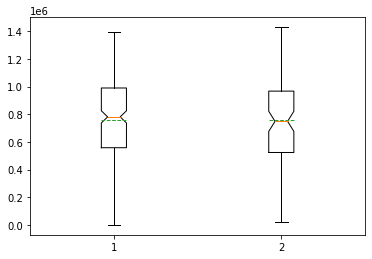

In [ ]:
#boxplot

#plt.boxplot([tg1, tg2])
plt.boxplot([tg1, tg2], meanline=True, showmeans=True, notch=True)
plt.show()


그래프를 보면 날씨에 따라 매출액에 큰 차이가 있는 것으로는 보이지 않는다.  


<br>

#### 정규성 검정  


In [ ]:
#print(stats.shapiro(tg1).pvalue)
#print(stats.shapiro(tg2).pvalue)

print(stats.shapiro(tg1)[1])
print(stats.shapiro(tg2)[1])

0.056049469858407974
0.882739782333374


<br>

#### 등분산성 검정  

In [ ]:
print(stats.levene(tg1, tg2).pvalue)

0.7123452333011173


<br>

#### 두 집단의 평균  

In [ ]:
print(np.mean(tg1), ' ', np.mean(tg2))

761040.2542372881   757331.5217391305


<br>

#### t-검정 실시 


In [ ]:
print(stats.ttest_ind(tg1, tg2, equal_var=True).pvalue)

0.919534587722196



p-value 0.91953 > 0.05 로 귀무가설 채택.  
해당 가게에서 강수여부에 따른 매출액 평균에 차이가 없다.  


<br>

# 📝 대응표본 T 검정 (Paired samples t-test)

서로 대응인 두 집단의 평균 차이 검정  

처리 이전과 처리 이후를 각각 모집단으로 판단하여 동일한 관찰 대상으로부터 처리 이전과 이후를 1:1로 대응시킨 두 집단으로부터의 표본을 대응 표본이라고 한다. 

대응인 두 집단의 평균 비교는 동일한 관찰대상으로 부터 처리 이전의 관찰과 이후의 관찰을 비교하여 영향을 미친 정도를 밝히는데 주로 사용한다.  
서로 다른 집단 간 비교가 아니므로 등분산 검정을 할 필요가 없다.  


<br>

## 연습 1)  특강 전후 시험점수의 차이  

가설설정  
> 귀무가설 : 4강의실 학생들을 대상으로 특강 전과 후의 시험점수는 차이가 있다.  
대립가설 : 4강의실 학생들을 대상으로 특강 전과 후의 시험점수는 차이가 없다.  

In [ ]:
import numpy as np
import scipy as sp
import scipy.stats as stats

np.random.seed(12)
x1 = np.random.normal(80, 10, 100)  #특강 전 시험점수
x2 = np.random.normal(77, 10, 100)  #특강 후 시험점수

<br>

### 정규성 확인  

In [ ]:
#print(stats.shapiro(x1).pvalue)
#print(stats.shapiro(x2).pvalue)

print(stats.shapiro(x1)[1])
print(stats.shapiro(x2)[1])

0.9942135810852051
0.7985416054725647


<br>

### 시각화  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x1, kde=False, fit=stats.norm)
sns.distplot(x2, kde=False, fit=stats.norm)
plt.show()



<br>

### 대응표본 t-검정 실시


In [ ]:
print(stats.ttest_rel(x1, x2))

Ttest_relResult(statistic=2.388932926547383, pvalue=0.018792247355705678)



pvalue=0.0187 로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.  


<br>

## 연습 2) 복부 수술 전후 몸무게 차이 검정  

9명의 사람들을 대상으로 복부 수술 전과 복부 수술 후 몸무게를 측정하여 변화가 있었는 지를 검정한다.  

가설설정
> 귀무가설 : 복부 수술 전후의 몸무게의 차이가 없다.  
대립가설 : 복부 수술 전후의 몸무게의 차이가 있다.  



In [ ]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

print(np.mean(baseline))
print(np.mean(follow_up))

78.41111111111111
71.5


<br>

### t-검정  

In [ ]:
p_result = stats.ttest_rel(baseline, follow_up)

print(p_result)

Ttest_relResult(statistic=3.6681166519351103, pvalue=0.006326650855933662)



p-value 0.006 < 0.05 이므로 대립가설을 채택한다.  
복부 수술 전과 후의 몸무게에 변화가 있다.  



<br>

# 💊 수면제 종류에 따른 수면시간의 변화  

수면제1을 복용하다가 수면제2를 복용할 때 수면시간에 변화가 있는가를 검정한다.  

하나의 데이터를 두 가지 상황으로 가정하고 두 가지 방법으로 검정한다.  

<br>

가설설정  
> 귀무가설 : 수면제의 종류에 따라 수면시간에 변화가 없다.
대립가설 : 수면제의 종류에 따라 수면시간에 변화가 있다.

In [ ]:
import numpy as np
from scipy import stats

x1 = np.array([0.7, 0.3, 0.1, -0.3, 0.2])  #수면제1
x2 = np.array([1.0, 1.3, 0.3, -0.1, 0.5])  #수면제2

<br>

## 독립표본 t-검정  

서로 다른 두 사람이 수면제를 복용한 경우  

In [ ]:
r = stats.ttest_ind(x1, x2, equal_var=True)
print(r)
print()

if r.pvalue > 0.05:
  print('수면제의 종류에 따라 수면시간에 변화가 없다.')
else:
  print('수면제의 종류에 따라 수면시간에 변화가 있다.')

Ttest_indResult(statistic=-1.3483997249264836, pvalue=0.21445866072113856)

수면제의 종류에 따라 수면시간에 변화가 없다.


<br>

## 대응표본 t-검정  

같은 사람이 수면제를 복용  

In [ ]:
r = stats.ttest_rel(x1, x2)
print(r)
print()

if r.pvalue > 0.05:
  print('수면제의 종류에 따라 수면시간에 변화가 없다.')
else:
  print('수면제의 종류에 따라 수면시간에 변화가 있다.')

Ttest_relResult(statistic=-2.637521893583148, pvalue=0.05772982650357326)

수면제의 종류에 따라 수면시간에 변화가 없다.


<br>

references:   
https://blog.minitab.com/ko/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics   